<center>
    
# Transmisión de Ondas en Interfaces

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
#Librarys
import numpy as np
from matplotlib import pyplot as plt

## Coeficientes de Fresnel

### Expresiones

Loa coeficientes de transmisión y reflexión de ondas electromagnéticas en una superficie plana para los casos de polarización lineal perpendicular y paralela están dados por las ecuaciones de Fresnel.

#### Polarización perpendicular
$$ t_\perp = \frac{\|\vec{E}^\perp_t\|}{\|\vec{E}^\perp_i\|} = \frac{2\frac{n_i}{\mu_i}cos(\theta_i)}{\frac{n_i}{\mu_i}cos(\theta_i)+\frac{n_t}{\mu_t}cos(\theta_t)}$$

$$ r_\perp = \frac{\|\vec{E}^\perp_t\|}{\|\vec{E}^\perp_i\|} = \frac{\frac{n_i}{\mu_i}cos(\theta_i)-\frac{n_t}{\mu_t}cos(\theta_t)}{\frac{n_i}{\mu_i}cos(\theta_i)+\frac{n_t}{\mu_t}cos(\theta_t)}$$

#### Polarización paralela
$$ t_\parallel = \frac{\|\vec{E}^\parallel_t\|}{\|\vec{E}^\parallel_i\|} = \frac{2\frac{n_i}{\mu_i}cos(\theta_i)}{\frac{n_t}{\mu_t}cos(\theta_i)+\frac{n_i}{\mu_i}cos(\theta_t)}$$

$$ r_\parallel = \frac{\|\vec{E}^\parallel_t\|}{\|\vec{E}^\parallel_i\|} = \frac{\frac{n_t}{\mu_t}cos(\theta_i)-\frac{n_i}{\mu_i}cos(\theta_t)}{\frac{n_t}{\mu_t}cos(\theta_i)+\frac{n_i}{\mu_i}cos(\theta_t)}$$

Donde $n=\frac{c}{\nu}$ es el indice de refracción del medio, dado por la razón entre la velocidad de la luz en el vacío y en el medio y $\mu$ es su permeabilidad magnética, y los angulos $\theta_i, \theta_t$ cumplen la ley de Snell ($n_isin(\theta_i)= n_tsin(\theta_t)$).

En el agua: $n = 1.33$ y $\mu\approx\mu_0$ (Permeabilidad magnética del vacío).

### Código

In [2]:
#Constants
n_i, mu_i = 1, 4*np.pi*10**7
n_t, mu_t = 1.33, mu_i

#Functions

def fresnelCoeficients(theta_i, n_i, n_t, mu_i, mu_t):
    
    sintheta_t = n_i*np.sin(theta_i)/n_t
    
    if np.absolute(sintheta_t) <= 1:
        costheta_t = np.sqrt(1-sintheta_t**2)

        #Perpendicular polarization
        t_n, r_n = np.array([2*(n_i/mu_i)*np.cos(theta_i), (n_i/mu_i)*np.cos(theta_i) - (n_t/mu_t)*costheta_t])/((n_i/mu_i)*np.cos(theta_i) + (n_t/mu_t)*costheta_t)
        
        #Parallel polarization
        t_p, r_p = np.array([2*(n_i/mu_i)*np.cos(theta_i), (n_t/mu_t)*np.cos(theta_i) - (n_i/mu_i)*costheta_t])/((n_t/mu_t)*np.cos(theta_i) + (n_i/mu_i)*costheta_t)
        
        return t_n, r_n, t_p, r_p
    else:
        return 0, 1, 0, 1
    
fresnelCoeficients = np.vectorize(fresnelCoeficients)

In [3]:
Theta = np.linspace(0, .5, 1000)
T_n, R_n, T_p, R_p = fresnelCoeficients(np.pi*Theta, n_i, n_t, mu_i, mu_t)

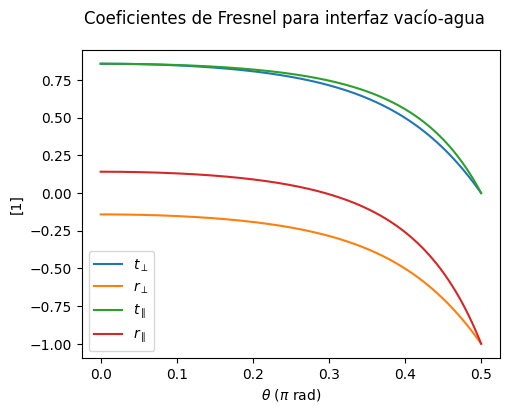

In [4]:
#Ploting
fig = plt.figure(figsize=(5.4, 4))
fig.suptitle("Coeficientes de Fresnel para interfaz vacío-agua")

ax1 = fig.add_subplot(1,1,1)
ax1.plot(Theta, T_n, label=r'$t_\perp$')
ax1.plot(Theta, R_n, label=r'$r_\perp$')
ax1.plot(Theta, T_p, label=r'$t_\parallel$')
ax1.plot(Theta, R_p, label=r'$r_\parallel$')
ax1.legend()
ax1.set_ylabel(r"[1]")
ax1.set_xlabel(r"$\theta$ ($\pi$ rad)")

plt.show()

## Transmitancia y Reflectancia en una lámina de plata

### Expresiones

Los coeficientes de transmisión y reflexión de una onda electromagnética que incide de forma normal sobre una lámina  plana de espesor $d$, con impedancia $Z=\sqrt{\frac{\mu}{\varepsilon}}$.

$$t = \frac{4Z_0Z}{e^{ikd}(Z_0+Z)²-e^{-ikd}(Z_0-Z)²}$$

$$r = \frac{(Z_0²-Z²)(e^{-ikd}-e^{ikd})}{e^{ikd}(Z_0+Z)²-e^{-ikd}(Z_0-Z)²}$$

Donde $Z_0$ es la impedancia del vacío.
La transmitancia y reflectancia son iguales a los módulos cuadrados de los coeficientres de transmisión y reflexíon respectivamente: $T=|t|²$ y $R=|r|²$.

La permitividad electrica relativa de un medio en función de la frecuencia $\omega$ de la luz se puede describir por el modelo de Drude-Lorentz.

$$\varepsilon_r = 1 - \frac{\omega_p²}{\omega²+i\omega \gamma}$$

Donde $\omega_p$ es la frecuencia de plasma del material y $\gamma$ es la frecuencia de colisión o constante de damping. En el caso de la plata estas constantes corresponden a frecuencias de $2.321 \times 10^{15} Hz$ y $5.513 \times 10^{12} Hz$ respectivamente.

### Código

In [5]:
#Constants
eps_0, mu_0 = 8.8541878176*10**(-12), 4*np.pi*10**(-7)
f_p, damping, mu_p = 2.321*10**15, 5.513*10**12, 0.99998*mu_0
f_i, f_f = 50*10**12, 300*10**12
d = 10**(-7)
Z_0 = np.sqrt(mu_0/eps_0)

#functions
def eps_r(f):
    return 1 - (f_p**2)/(f**2 + 1j*damping*f)

def coeficients(f):
    
    eps_p = eps_r(f)*eps_0
    Z_p = np.sqrt(mu_p/eps_p)
    eitheta = np.exp(2j*np.pi*f*np.sqrt(mu_p*eps_p)*d)
    
    A = (np.absolute(4*Z_0*Z_p))**2
    B = (np.absolute((Z_0**2 - Z_p**2)*((1/eitheta)-eitheta)))**2
    C = (np.absolute(((Z_0+Z_p)**2)*eitheta - ((Z_0-Z_p)**2)/eitheta))**2
    
    return np.array([A, B])/C

In [6]:
F  = np.linspace(f_i, f_f, 10000)
T, R = coeficients(F)

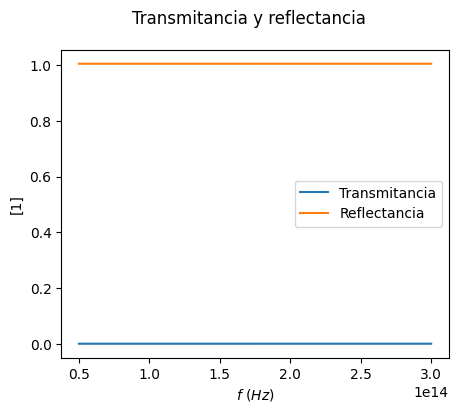

In [7]:
fig = plt.figure(figsize=(5, 4))
fig.suptitle("Transmitancia y reflectancia")

ax1 = fig.add_subplot(1,1,1)
ax1.plot(F, T, label='Transmitancia')
ax1.plot(F, R, label='Reflectancia')
ax1.legend()
ax1.set_ylabel(r"[1]")
ax1.set_xlabel(r"$f$ $(Hz)$")

plt.show()